In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
df = pd.read_csv("features.csv")
df.shape

(2471, 218)

In [3]:
df.head()

,id,action_time_mean,action_time_median,action_time_sem,action_time_sum,action_time_skew,cursor_position_nunique,cursor_position_max,cursor_position_last,cursor_position_median,...,paragraph_word_count_max,paragraph_word_count_first,paragraph_word_count_last,paragraph_word_count_sem,paragraph_word_count_q1,paragraph_word_count_median,paragraph_word_count_q3,paragraph_word_count_skew,paragraph_word_count_sum,paragraph_word_count_kurtosis_func
0,001519c8,0.116247,0.112,0.001815,297.243,12.546928,1469,1539,1046,727.0,...,112,71,86,11.976829,78.50,86.0,99.00,0.770543,269,0.000000
1,0022f953,0.112221,0.115,0.001119,275.391,10.902216,1416,1676,1519,743.0,...,96,53,60,8.316316,47.75,56.5,62.25,1.299614,355,2.342703
2,0042269b,0.101838,0.094,0.001281,421.201,16.611183,1649,2291,491,530.5,...,88,79,45,6.926599,55.50,73.5,78.75,-0.502908,410,-1.536764
3,0059420b,0.121848,0.110,0.002884,189.596,2.426886,1048,1047,797,593.5,...,81,62,65,5.897269,63.50,65.0,73.00,1.565482,208,0.000000
4,0075873a,0.123944,0.129,0.001234,313.702,1.890640,1197,1402,1402,630.0,...,114,61,3,18.706683,26.00,52.0,61.00,0.686760,256,0.722916


In [4]:
df.describe()
max_values = df.describe().loc['max']
print(max_values)

action_time_mean                         0.282612
action_time_median                       0.203000
action_time_sem                          0.124271
action_time_sum                       1210.508000
action_time_skew                        83.209688
                                         ...     
paragraph_word_count_median            609.000000
paragraph_word_count_q3                893.000000
paragraph_word_count_skew                3.301183
paragraph_word_count_sum              3820.000000
paragraph_word_count_kurtosis_func      11.729788
Name: max, Length: 217, dtype: float64


In [5]:
DO_SCALER = True

target_col = ['score']
drop_cols = ['id']
train_cols = [col for col in df.columns if col not in target_col + drop_cols]

for column in tqdm(df[train_cols].columns):
    try:
        scaler = StandardScaler()
        if DO_SCALER:
            df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
#             print("Successfully Excute!")
        else:
            output = scaler.fit_transform(df[column].values.reshape(-1, 1))
#             print("Successfully Output!")
    except:
        print(column)

100%|██████████| 216/216 [00:00<00:00, 1289.15it/s]


In [6]:
df['score']

0       3.5
1       3.5
2       6.0
3       2.0
4       4.0
       ... 
2466    3.5
2467    4.0
2468    1.5
2469    5.0
2470    4.0
Name: score, Length: 2471, dtype: float64

In [7]:
feature_columns = [col for col in df.columns if ((col != 'id') and (col != 'score'))]
print(len(feature_columns))

216


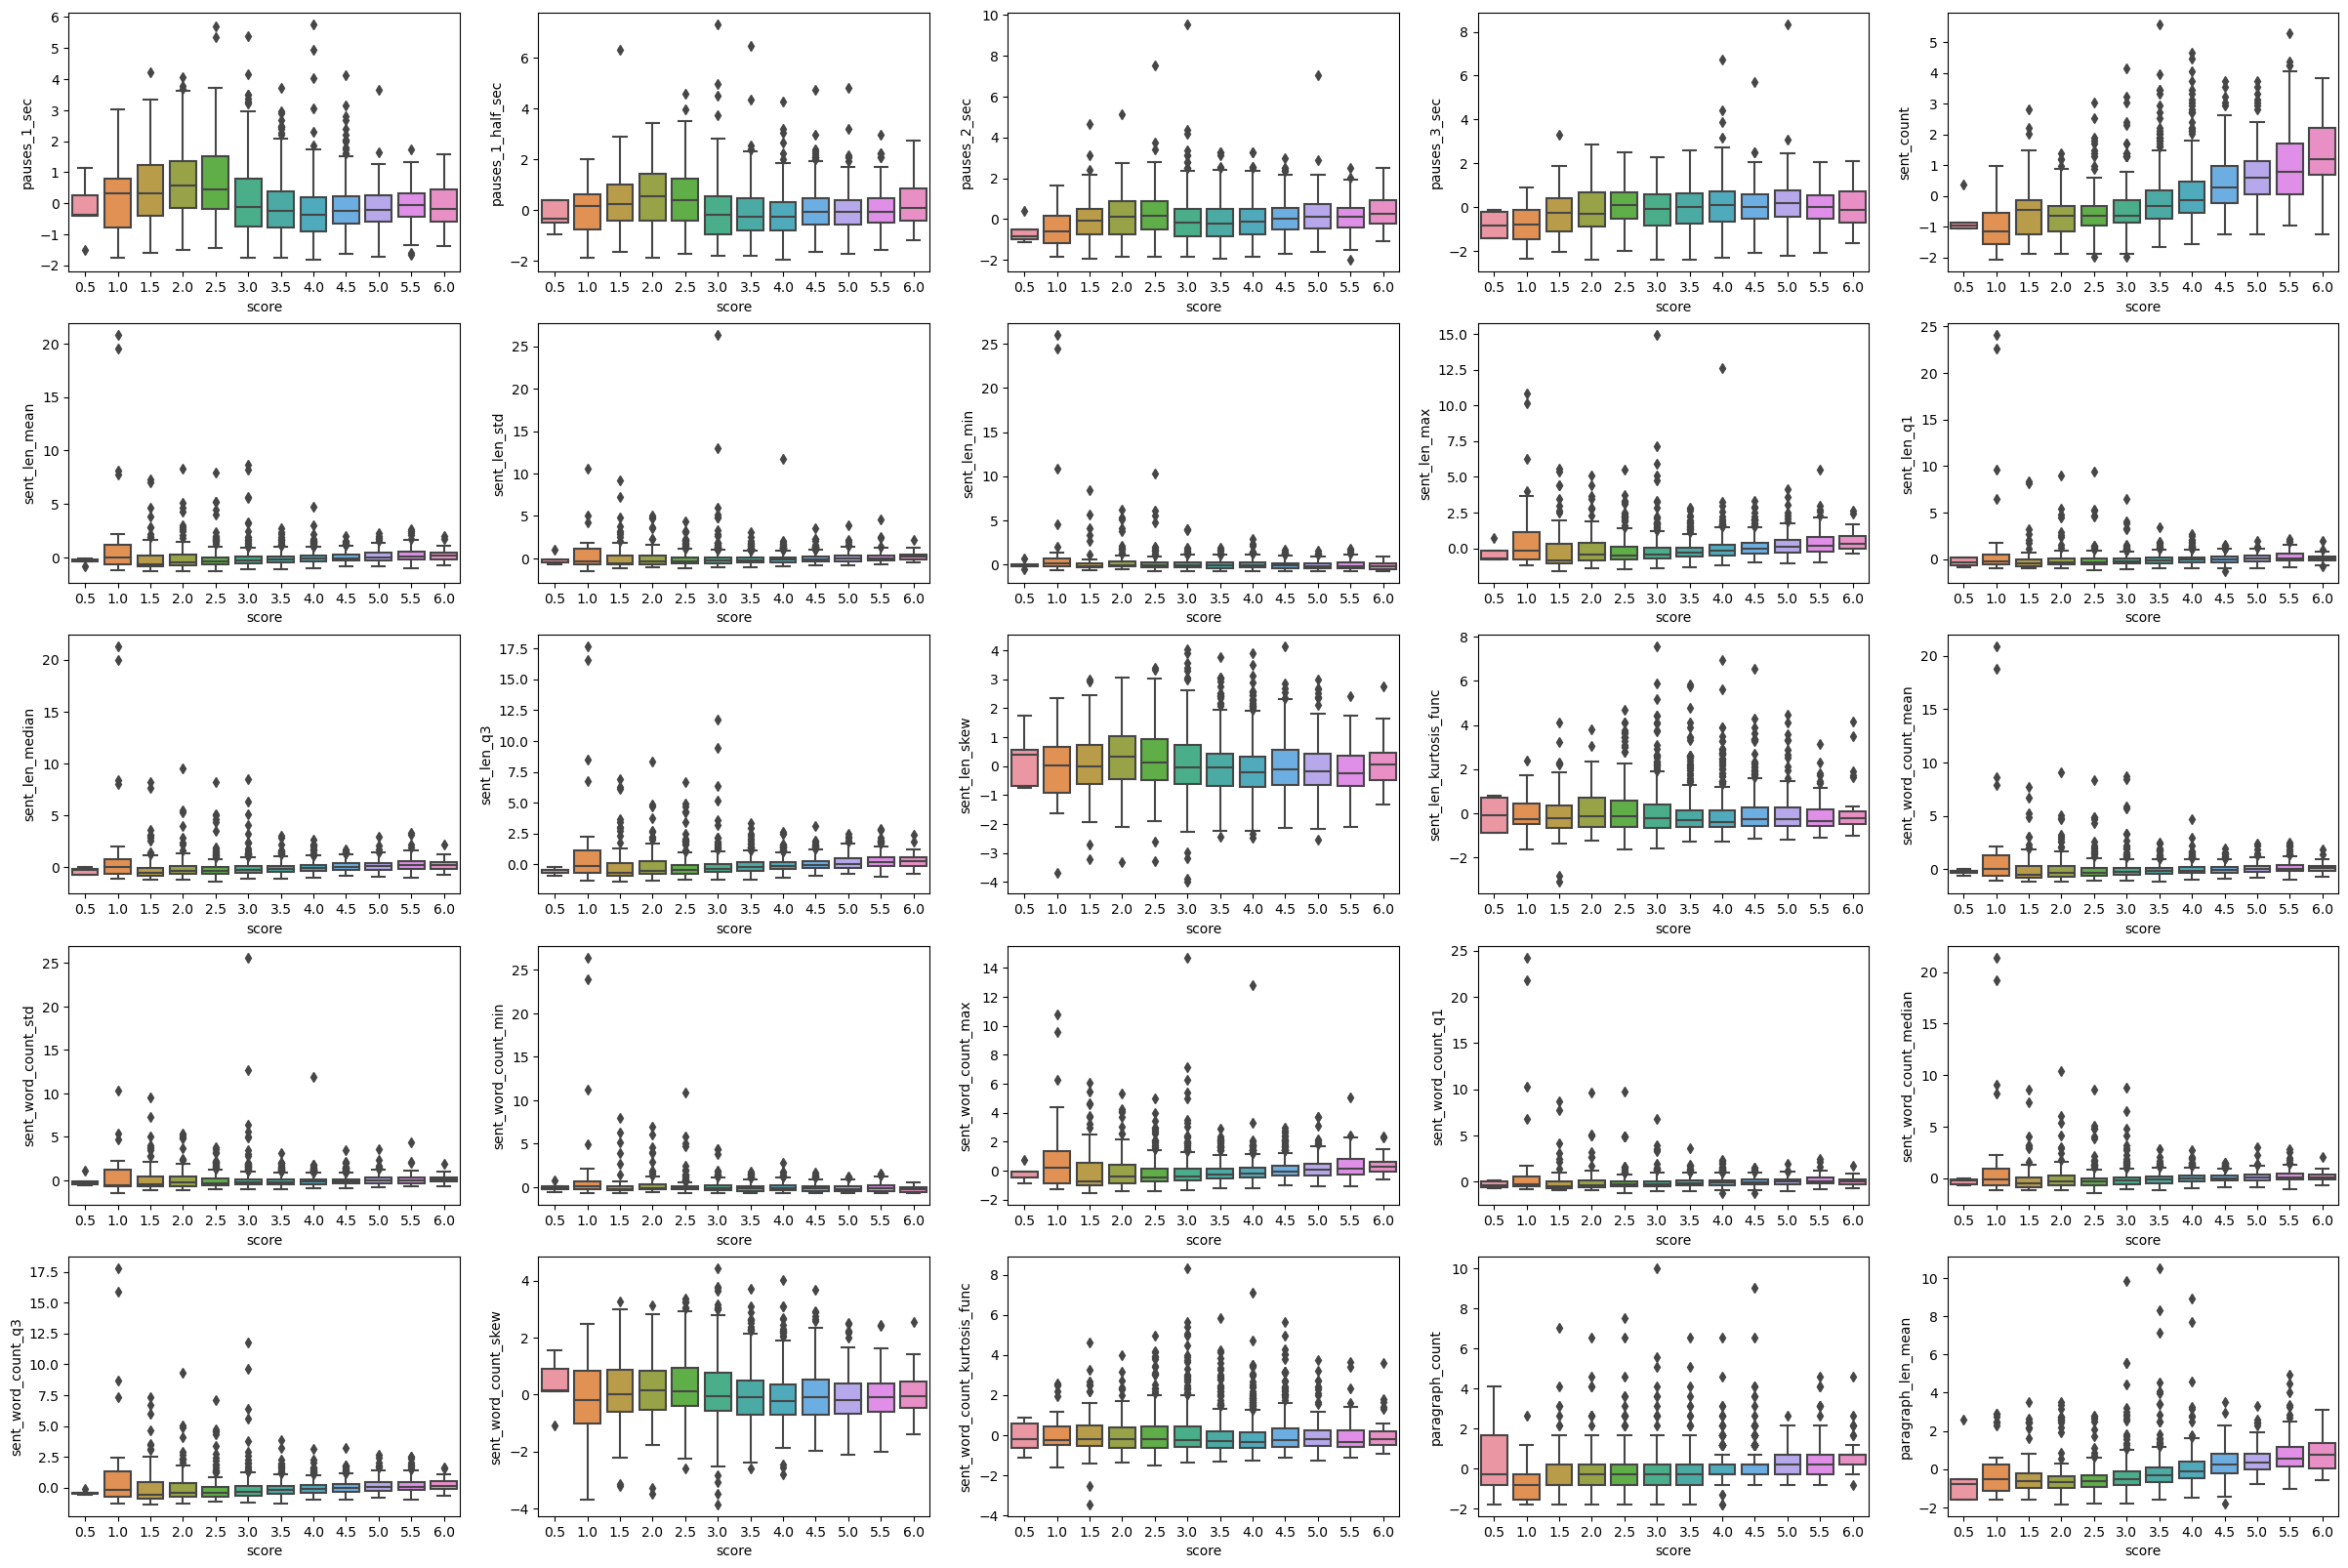

In [8]:
plt.figure(figsize=(30, 20))
for idx, feature in enumerate(feature_columns[-50:-25]):
    plt.subplot(5, 5, idx + 1)
    sns.boxplot(
        data=df,
        x='score',
        y=feature
    )
plt.show()